<a href="https://colab.research.google.com/github/VinodKumar9576/DS-Interview-Questions/blob/master/DS_interview_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/VinodKumar9576/DS-Interview-Questions/blob/master/DS_interview_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Site 1**

https://hackernoon.com/technical-data-science-interview-questions-sql-and-coding-jv1k32bf
<br>

https://github.com/alexeygrigorev/data-science-interviews/blob/master/technical.md

##**SQL**

Solutions: <br>
https://github.com/VinodKumar9576/data-science-interviews/blob/master/technical.md

1) The number of active ads

In [ ]:
select count(*) from ads where status = 'active';

2) All active campaigns. A campaign is active if there’s at least one active ad.

In [ ]:
select distinct compaign_id from ads where status = 'active';

3) The number of active campaigns.

In [ ]:
select count(distinct compaign_id) from ads where status = 'active';

4) The number of events per each ad — broken down by event type.

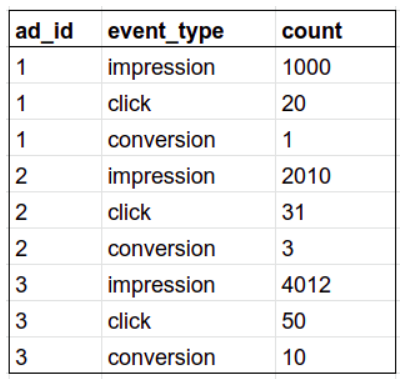

In [ ]:
select a.ad_id, b.event_type, count(b.event_type) from ads a
join events b on a.ad_id = b.ad_id group by a.ad_id, e.event_type; 

5) The number of events over the last week per each active ad — broken down by event type and date (most recent first).

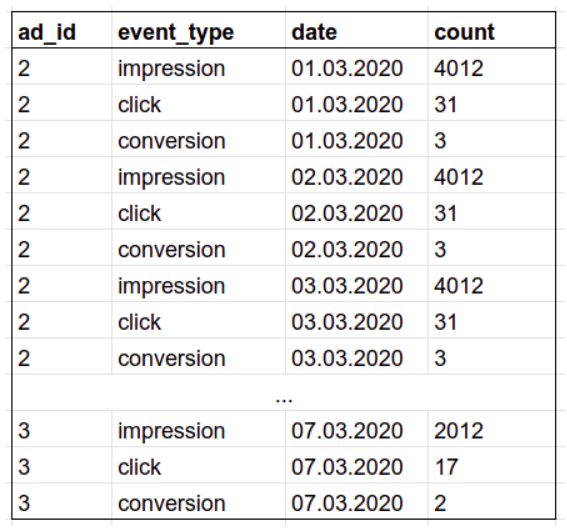

In [ ]:
select a.ad_id, b.event_type, b.date, count(*) as "count" from ads a join events b on a.ad_id = b.ad_id
where a.status = 'active' and b.date > sysdate-7 group by a.ad_id, b.event_type, b.date
order by b.date asc, count desc;

6) The number of events per campaign — by event type.
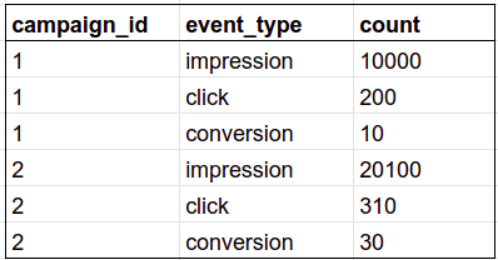

In [ ]:
select a.campaign_id, b.event_type, count(*) "count" from ads a join events b 
on a.ad_id = b.ad_id group by a.campaign_id, b.event_type order by campaign_id asc,
count desc;

7) The number of events over the last week per each campaign — broken down by date (most recent first).

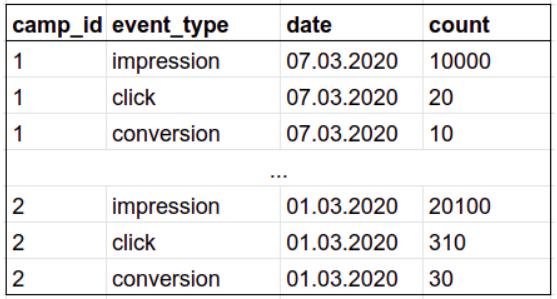

In [ ]:
select a.campaign_id, b.event_type, b.date, count(*) from ads a join events b on a.ad_id = b.ad_id
where date > sysdate-7 group by a.campaign_id, b.event_type, b.date order by a.campaign_id asc, b.date desc;

8) CTR (click-through rate) for each ad. CTR = number of impressions / number of clicks.

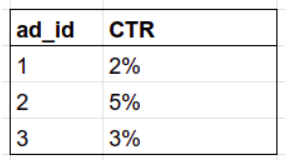

* First we make a temporary table that holds data of ad_id, sum(impressions), sum(clicks).

In [ ]:
select impressions_clicks_table.campaign_id,
        (impressions_click_table.impressions/impressions_click_table.clicks)*100 CTR
  from 
(select a.compaign_id,
      sum(case when b.event_type = 'impression' then 1 else 0) impressions
      sum(case when b.event_type = 'click' then 1 else 0) clicks
  frm ads a inner join events b on a.ad_id = b.ad_id group by a.campaign_id) impressions_clicks_table

order by impressions_click_table.campaign_id;

9) CVR (conversion rate) for each ad. CVR = number of clicks / number of installs.

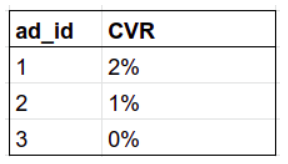

In [ ]:
select clicks_installs_table.campaign_id,
        (clicks_installs_table.clicks/clicks_installs_table.installs)*100 CTR
  from 
(select a.compaign_id,
      sum(case when b.event_type = 'install' then 1 else 0) installs
      sum(case when b.event_type = 'click' then 1 else 0) clicks
  frm ads a inner join events b on a.ad_id = b.ad_id group by a.campaign_id) clicks_installs_table

order by clicks_installs_table.campaign_id;

10) CTR and CVR for each ad broken down by day and hour (most recent first).

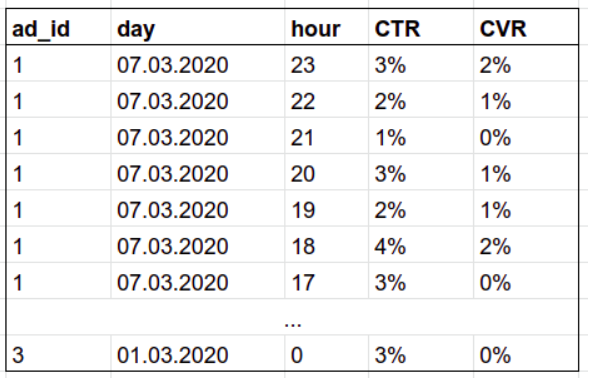

In [ ]:
select ad_id, day, hour, CTR, CVR from
  (select meta_table.ad_id, meta_table.impressions/meta_table.clicks * 100 CTR, meta_table.installs/meta_table.clicks * 100 as CVR
   FROM (
       select a.ad_id,
              sum(case when b.event_type = 'impressions' then 1 else 0) as impressions,
              sum(case when b.event_type = 'clicks' then 1 else 0) as clicks,
              sum(case when b.eventy_type = 'installs' then 1 else 0) as installs
         from ads a inner join events b on a.ad_id = b.ad_id group by a.ad_id, b.date, b.hour
   ) as meta_table) ctr_cvr_table

11) CTR for each ad broken down by source and day.

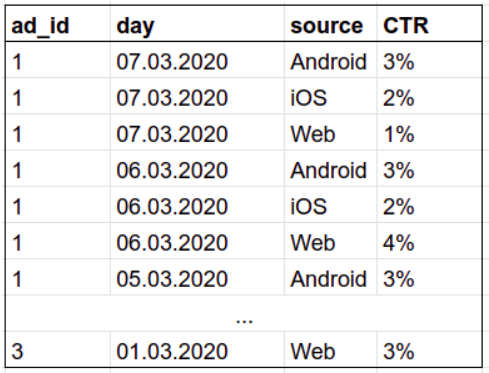

##**Coding (Python)**

1) **FizzBuzz**. Print numbers from 1 to 100

* If it’s a multiplier of 3, print “Fizz”
* If it’s a multiplier of 5, print “Buzz”
* If both 3 and 5 — “Fizz Buzz"
* Otherwise, print the number itself

Example of output: 1, 2, Fizz, 4, Buzz, Fizz, 7, 8, Fizz, Buzz, 11, Fizz, 13, 14, Fizz Buzz, 16, 17, Fizz, 19, Buzz, Fizz, 22, 23, Fizz, Buzz, 26, Fizz, 28, 29, Fizz Buzz, 31, 32, Fizz, 34, Buzz, Fizz, ...

In [ ]:
for i in range(1,101):
  if(i%3==0):
    print('Fizz')
  elif (i%5 == 0):
    print('Buzz')
  elif(i%3 == 0 and i%5 == 0):
    print('Fizz Buzz')
  else:
    print(i)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
Fizz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
Fizz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
Fizz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
Fizz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
Fizz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
Fizz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


2) **Factorial**. Calculate a factorial of a number

* `factorial(5)` = 5! = 1 * 2 * 3 * 4 * 5 = 120
* `factorial(10)` = 10! = 1 * 2 * 3 * 4 * 5 * 6 * 7 * 8 * 9 * 10 = 3628800

In [ ]:
def factorial(n):
  fact = 1
  for i in range(1,n+1):
    fact *=i
  return fact

**Using Recursion**

In [ ]:
def factorial(n):
  if n==0 or n==1:
    return 1
  else:
    return n*factorial(n-1)

3) **Mean.** Compute the mean of number in a list

* `mean([4, 36, 45, 50, 75]) = 42`
* `mean([]) = NaN (use float('NaN'))`

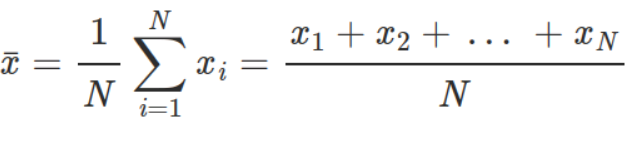

In [ ]:
def meani(ls):
  if len(ls)>0:
    lt = len(ls)
    tot = sum(ls)
    mn = tot/lt
    return mn
  return float('NaN')

In [ ]:
ls = [4, 36, 45, 50, 75]
meani(ls)

42.0

4) **STD**. Calculate the standard deviation of elements in a list.

* `std([1, 2, 3, 4]) = 1.29`
* `std([1]) = NaN`
* `std([]) = NaN`

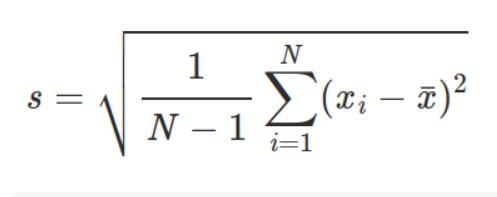

In [ ]:
from math import sqrt
import numpy as np

def std_dev(numbers):
  if len(numbers)>0:
    avg = np.mean(numbers)
    var = sum([(i-avg)**2 for i in numbers])/len(numbers)
    ans = sqrt(var)
    return np.round(ans,2)
  return float('NaN')

In [ ]:
std_dev([1, 2, 3, 4])

1.12

5) **RMSE**. Calculate the RMSE (root mean squared error) of a model. The function takes in two lists: one with actual values, one with predictions.

* `rmse([1, 2], [1, 2]) = 0`
* `rmse([1, 2, 3], [3, 2, 1]) = 1.63`

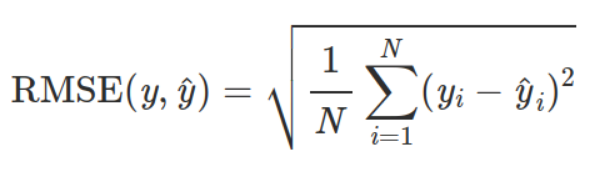

https://www.w3schools.com/python/ref_keyword_assert.asp#:~:text=The%20assert%20keyword%20is%20used,False%2C%20check%20the%20example%20below.

* **Assertion** lets you check if the given condition is `true` and after lines will be executed only if the condition is true.
* Else `Assertion error` is raised
* Same like if condition, but with extra error functionality.
* Error raising here is important, coz two sets shouldn't have different lengths' set.

In [ ]:
from math import sqrt

def rmse(y_tr, y_pred):
  assert len(y_tr) == len(y_pred), 'Different sizes of the argument'
  diff = sum((tr-pred)**2 for tr,pred in zip(y_tr,y_pred))/len(y_tr)
  ans = sqrt(diff)
  return ans

In [ ]:
rmse([1, 2], [1, 2])

0.0

In [ ]:
rmse([1, 2, 3], [3, 2, 1])

1.632993161855452

In [ ]:
rmse([1, 2], [3, 2, 1])

AssertionError: ignored

6) **Remove duplicates**. Remove duplicates in list. The list is not sorted and the order of elements from the original list should be preserved.

* `[1, 2, 3, 1] ⇒ [1, 2, 3]`
* `[1, 3, 2, 1, 5, 3, 5, 1, 4] ⇒ [1, 3, 2, 5, 4]`

https://stackoverflow.com/questions/480214/how-do-you-remove-duplicates-from-a-list-whilst-preserving-order

In [ ]:
def rem_dups(ls):
  seen = set()
  seen_add = seen.add
  return [x for x in ls if not (x in seen or seen.add(x))]

In [ ]:
rem_dups([1, 2, 3, 1])

[1, 2, 3]

In [ ]:
rem_dups([1, 3, 2, 1, 5, 3, 5, 1, 4])

[1, 3, 2, 5, 4]

* Why assign `seen.add` to `seen_add` instead of just calling `seen.add`?
* Python is a dynamic language, and resolving `seen.add` each iteration is more costly than resolving a local variable. 
* `seen.add` could have changed between iterations, and the runtime isn't smart enough to rule that out.
* To play it safe, it has to check the object each time.
* `seen.add()` always returns `None`, so the `or` above is there only as a way to attempt a set update, and not as an integral part of the logical test.

7) **Count**. Count how many times each element in a list occurs.

`[1, 3, 2, 1, 5, 3, 5, 1, 4]` ⇒

* 1: 3 times
* 2: 1 time
* 3: 2 times
* 4: 1 time
* 5: 2 times

In [ ]:
def counts(ls):
  count = dict()
  for i in ls:
    count[i] = count.get(i,0) + 1
  return count

In [ ]:
counts([1, 3, 2, 1, 5, 3, 5, 1, 4])

{1: 3, 2: 1, 3: 2, 4: 1, 5: 2}

**Using Collections**

In [ ]:
from collections import Counter

numbers = [1, 3, 2, 1, 5, 3, 5, 1, 4]
counter = Counter(numbers)
print(counter)

Counter({1: 3, 3: 2, 5: 2, 2: 1, 4: 1})


In [ ]:
numbers[::]

[1, 3, 2, 1, 5, 3, 5, 1, 4]

8) **Palindrome**. Is string a palindrome? A palindrome is a word which reads the same backward as forwards.

* `“ololo” ⇒ Yes`
* `“cafe” ⇒ No`

In [ ]:
#reversing the string and checking if both are equal
def is_palindrome(s):
  return s == s[::-1]

In [ ]:
is_palindrome('ololo')

True

In [ ]:
is_palindrome('cafe')

False

**Another way**

In [ ]:
#comparing each element from starting and from ending
def is_palindrome(s):
  for i in range(len(s) // 2):
    if(s[i] != s[-i-1]):
      return False
  return True

In [ ]:
is_palindrome('cafe')

False

9) **Counter**. We have a list with identifiers of form “id-SITE”. Calculate how many ids we have per site.

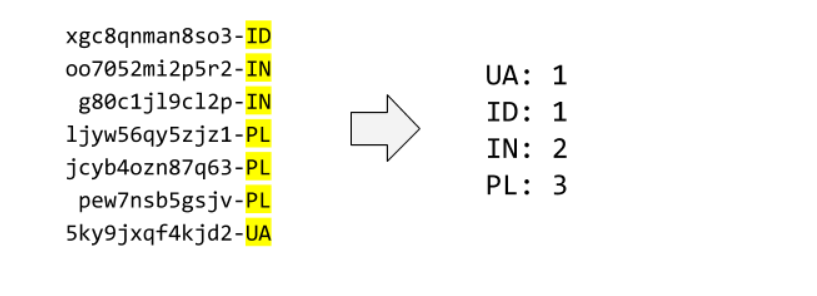

In [ ]:
#Lets assume we are given all the id-SITE as list elements

def id_ext(ls):
  id_dt = dict()
  for sit in ls:
    ids = sit.split('-')[1]
    id_dt[ids] = id_dt.get(ids,0)+1

  return id_dt


In [ ]:
id_sit = ['asdfsfdsdf-ID','osdooroergo-IN','iuerourtuor-IN','dhdhfjkdhfgh-PL',
          'ljasijoiasf-PL','pipoiqew-PL','984ojrg98u4-UA']

id_ext(id_sit)

{'ID': 1, 'IN': 2, 'PL': 3, 'UA': 1}

10) **Top counter**. We have a list with identifiers of form “id-SITE”. Show the top 3 sites. You can break ties in any way you want.

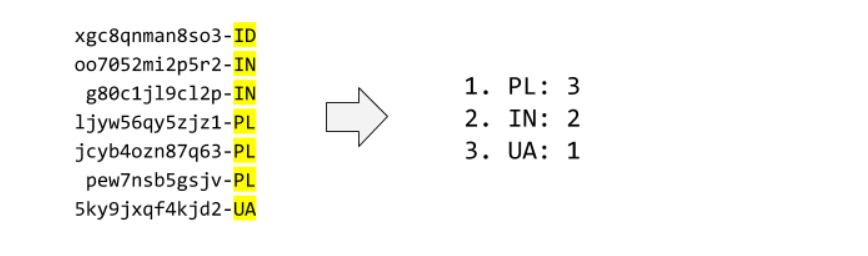

In [ ]:
def top_counter(lst, top_k):
  ids = [sit.split('-')[1] for sit in lst]
  ids_dt = dict()
  for id in ids:
    ids_dt[id] = ids_dt.get(id,0)+1

  #sortin the keys based on their values
  top_keys = sorted(ids_dt, reverse = True, key= ids_dt.get)

  #return top IDs
  for i,key in enumerate(top_keys[:top_k]):
    print(key, ':', ids_dt[key])

In [ ]:
top_counter(id_sit, 3)

PL : 3
IN : 2
ID : 1


11) **RLE**. Implement RLE (run-length encoding): encode each character by the number of times it appears consecutively.

* `'aaaabbbcca' ⇒ [('a', 4), ('b', 3), ('c', 2), ('a', 1)]`
* `(note that there are two groups of 'a')`

In [ ]:
def rle(s):
  ans, cur, num = [], None, 0
  for i in range(len(s)):
    if i == 0:
      cur, num = s[i], 1
    elif cur != s[i]:
      ans.append((cur, num))
      cur, num = s[i], 1
    else:
      num +=1
    #end condition for the last character
    if i ==len(s)-1:
      ans.append((cur, num))
  return ans

In [ ]:
rle('aaaabbbcca')

[('a', 4), ('b', 3), ('c', 2), ('a', 1)]

**Using itertools.groupby**

In [ ]:
import itertools

def rle(s):
  return [(l, len(list(g))) for l, g in itertools.groupby(s)]

In [ ]:
rle('aaaabbbcca')

[('a', 4), ('b', 3), ('c', 2), ('a', 1)]

In [ ]:
for l, g in itertools.groupby('aaaabbbcca'):
  print(l, ' ',  list(g))

a   ['a', 'a', 'a', 'a']
b   ['b', 'b', 'b']
c   ['c', 'c']
a   ['a']


12) **Jaccard**. Calculate the Jaccard similarity between two sets: the size of intersection divided by the size of union.

* `jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4`


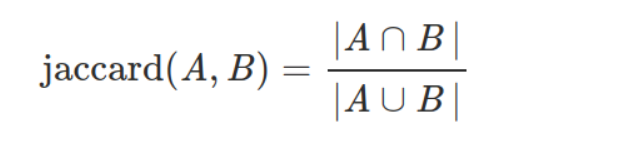

In [ ]:
#Note that a, b are two sets here

def jaccard(a, b):
  return len(a & b) / len(a | b)

In [ ]:
jaccard({'a', 'b', 'c'}, {'a', 'd'})

0.25

13) **IDF**. Given a collection of already tokenized texts, calculate the IDF (inverse document frequency) of each token.

* `input example: [['interview', 'questions'], ['interview', 'answers']]`

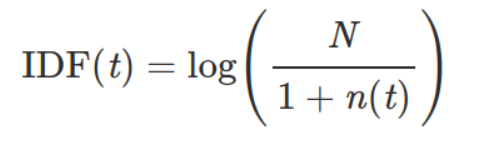


Where:

* t is the token,
* n(t) is the number of documents that t occurs in,
* N is the total number of documents


In [ ]:
from math import log10

def idf(docs):
  #removing dups tokens in each doc
  docs = [set(doc) for doc in docs]
  n_tokens = {}

  for doc in docs:
    for token in doc:
      #storing the freq of each token
      n_tokens[token] = n_tokens.get(token, 0) + 1
  ans = {}
  for token in n_tokens:
    ans[token] = log10(len(docs) / (1+ n_tokens[token]))
  
  return ans

In [ ]:
idf([['interview', 'questions'], ['interview', 'answers']])

{'answers': 0.0, 'interview': -0.17609125905568127, 'questions': 0.0}

14) **TF**: Term-Frequency : Ratio of number of times a word occurs in a document to the total number of words in that document.

In [ ]:
def tf(docs):
  final = []
  for doc in docs:
    tokens = set(doc)

    ans = {}
    for token in doc:
      ans[token] = ans.get(token, 0) + 1

    ans = {k: v/len(tokens) for k,v in ans.items()}
    final.append(ans)
  
  return final

In [ ]:
tf([['interview', 'questions'], ['interview', 'answers']])

[{'interview': 0.5, 'questions': 0.5}, {'answers': 0.5, 'interview': 0.5}]

15) **PMI**. Given a collection of already tokenized texts, find the PMI (pointwise mutual information) of each pair of tokens. Return top 10 pairs according to PMI.

* input example: `[['interview', 'questions'], ['interview', 'answers']]`

PMI is used for finding collocations in text — things like “New York” or “Puerto Rico”. For two consecutive words, the PMI between them is:

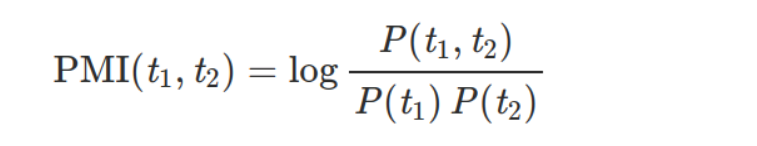

The higher the PMI, the more likely these two tokens form a collection. We can estimate PMI by counting:

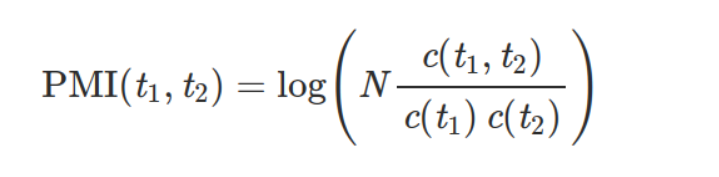

Where:

* N is the total number of tokens in the text,
* c(t1, t2) is the number of times t1 and t2 appear together,
* c(t1) and c(t2) — the number of times they appear separately.

##**Algorithmic Questions**

1) **Two sum**. Given an array and a number N, return True if there are numbers A, B in the array such that A + B = N. Otherwise, return False.

* `[1, 2, 3, 4], 5` ⇒ `True`
* `[3, 4, 6], 6` ⇒ `False`

**Brute force, O($n^2$):**

In [ ]:
def two_sum(ls, N):
  for i in range(len(ls)):
    for j in range(i+1, len(ls)):
      if(ls[i]+ls[j] == N):
        return True
  
  return False

In [ ]:
two_sum([1, 2, 3, 4], 5)

True

**Linear, O(n):**

In [ ]:
def two_sum(ls, N):
  index = {num : i for (i, num) in enumerate(ls)}

  for i in range(len(ls)):
    a = ls[i]
    b = N - a

    if b in index: #here if condition checks in keys of dictionary
      j = index[b]
      if i!=j:
        return True
  return False

In [ ]:
two_sum([1, 2, 3, 4], 5)

True

**Using itertools.combinations**
* Here we are using combinations function to get the combination of elements

In [ ]:
from itertools import combinations

def two_sum(ls, N):
  for i in combinations(ls, 2):
    if i[0] + i[1] == N:
      return True
  return False

In [ ]:
two_sum([1, 2, 3, 4], 5)

True

2) **Fibonacci**. Return the n-th Fibonacci number, which is computed using this formula:

* F(0) = 0
* F(1) = 1
* F(n) = F(n-1) + F(n-2)
* The sequence is: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

**naive, complexity = O($2^n$)**

In [ ]:
def fibonacci(n):
  if n==0 or n ==1:
    return n
  else:
    return fibonacci(n-1)+fibonacci(n-2)

In [ ]:
fibonacci(4)

3

**dynamic programming, complexity = O(n)**

In [ ]:
def fibonacci(n):
  base1, base2 = 0, 1
  for i in range(n):
    base1, base2 = base2, base1+base2
  return base1

In [ ]:
fibonacci(4)

3

**matrix multiplication, complexity = O(log(n))**

In [ ]:
def fibonacci(n):

  def mx_mul(m1, m2):
    ans = [[0 for i in range(len(m2[0]))] for j in range(len(m1))]
    for i in range(len(m1)):
      for j in range(len(m2[0])):
        for k in range(len(m2)):
          ans[i][j] += m1[i][k] * m2[k][j]
    return ans
  
  def pow(a, b):
    ans = [[1, 0], [0, 1]]

    while b > 0:
      if b%2 == 1:
        ans = mx_mul(ans, a)
      a = mx_mul(a, a)
      b //= 2
    return ans


  ans = mx_mul(pow([[1, 1], [1, 0]], n), [[1], [0]])[1][0]

  return ans

In [ ]:
fibonacci(4)

3

**Memoization with a dictionary**

* Top down + memorization (dictionary), complexity = O(n)


In [ ]:
mem = {0:1, 1:1}

def fibonacci(n):
  if n not in mem:
    mem[n] = fibonacci(n-1) + fibonacci(n-2)
  return mem[n]

In [ ]:
fibonacci(4)

5

**Memoization with a list**

* Top down + memorization (list), complexity = O(n)


In [ ]:
def fibonacci(n):
  if n==1:
    return 1
  
  dic = [-1 for i in range(n)]
  dic[0], dic[1] = 1, 1
  
  def helper(n, dic):
    if dic[n] < 0:
      dic[n] = helper(n-1, dic) + helper(n-2, dic)
    return dic[n]
  return helper(n-1, dic)

In [ ]:
fibonacci(6)

8

**Memoization with `lru_cache`**

In [ ]:
from functools import lru_cache

@lru_cache()
#underlying data structure for lru_cache is dictionary

def fibonacci(n):
  if n == 0 or n == 1:
    return n
  return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
fibonacci(4)

3

3) **Most frequent outcome**. We have two dice of different sizes (D1 and D2). We roll them and sum their face values. What are the most probable outcomes?

* 6, 6 ⇒ [7]
* 2, 4 ⇒ [3, 4, 5]

In [ ]:
def most_frequent_outcome(d1, d2):
  len_ans = abs(d1 - d2) + 1
  mi = min(d1, d2)
  ans = [mi + i for i in range(1, len_ans+1)]
  return ans

In [ ]:
most_frequent_outcome(6,6)

[7]

In [ ]:
most_frequent_outcome(2,4)

[3, 4, 5]

4) **Reverse a linked list**. Write a function for reversing a linked list.

* The definition of a list node: `Node(value, next)`
* Example: `a -> b -> c` ⇒ `c -> b -> a`

In [ ]:
def reverse_ll(head):
  if head.next is not None:
    